In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Imports pre-combined data

In [2]:
combo = pd.read_csv("fin_combo.csv") # combo : merge dataset 1 2 and 3

In [3]:
# drops "Unnamed: 0" column for combo
combo = combo.drop('Unnamed: 0',axis = 1)

In [4]:
combo

,console,date,metascore,name,tot_sale,userscore
0,3DS,2012,68.0,FIFA Soccer 13,0.29,37.0
1,3DS,2016,81.0,Kirby: Planet Robobot,0.93,87.0
2,3DS,2011,61.0,Rayman 3D,0.64,66.0
3,3DS,2011,43.0,Asphalt 3D,0.49,44.0
4,3DS,2011,77.0,Tom Clancy's Ghost Recon: Shadow Wars,0.34,79.0
5,3DS,2014,76.0,Pokemon Art Academy,0.49,77.0
6,3DS,2016,71.0,Terraria,0.09,71.0
7,3DS,2011,65.0,Resident Evil: The Mercenaries 3D,0.49,64.0
8,3DS,2012,71.0,Rayman Origins,0.15,63.0
9,3DS,2011,82.0,Skylanders: Spyro's Adventure,0.57,49.0


## Plotting User Scores and Critic Scores by the Sales (in millions) for each Consoles

In [5]:
# Split combo into smaller dataframes according to the console and store them in a list "grouped"
grouped = combo.groupby('console')

### Assemble nintendo console games

In [6]:
combonintendo = grouped.get_group('GC') # Creates a dataframe combonintendo
nintendo_list = ['DS', '3DS', 'Wii', 'GBA', 'WiiU'] # Types of nintendo consoles

for i in nintendo_list:
    combonintendo = combonintendo.append(grouped.get_group(i), ignore_index = True)

### Assemble PC console games

In [7]:
combopc = grouped.get_group('PC') # Creates a dataframe combopc

### Assembles xbox console games

In [8]:
comboxbox = grouped.get_group('XOne') # Creates a dataframe comboxbox

comboxbox = comboxbox.append(grouped.get_group('X360'), ignore_index = True)
comboxbox = comboxbox.append(grouped.get_group('XB'), ignore_index = True)

### Assembles playstation console games

In [9]:
combosony = grouped.get_group('PS') # Store info on the original Playstation as of this line.
sony_list = ['PS2', 'PS3', 'PS4', 'PSP', 'PSV'] # Types of playstation consoles

for i in sony_list:
    combosony = combosony.append(grouped.get_group(i), ignore_index = True)

### Prints scatter plot

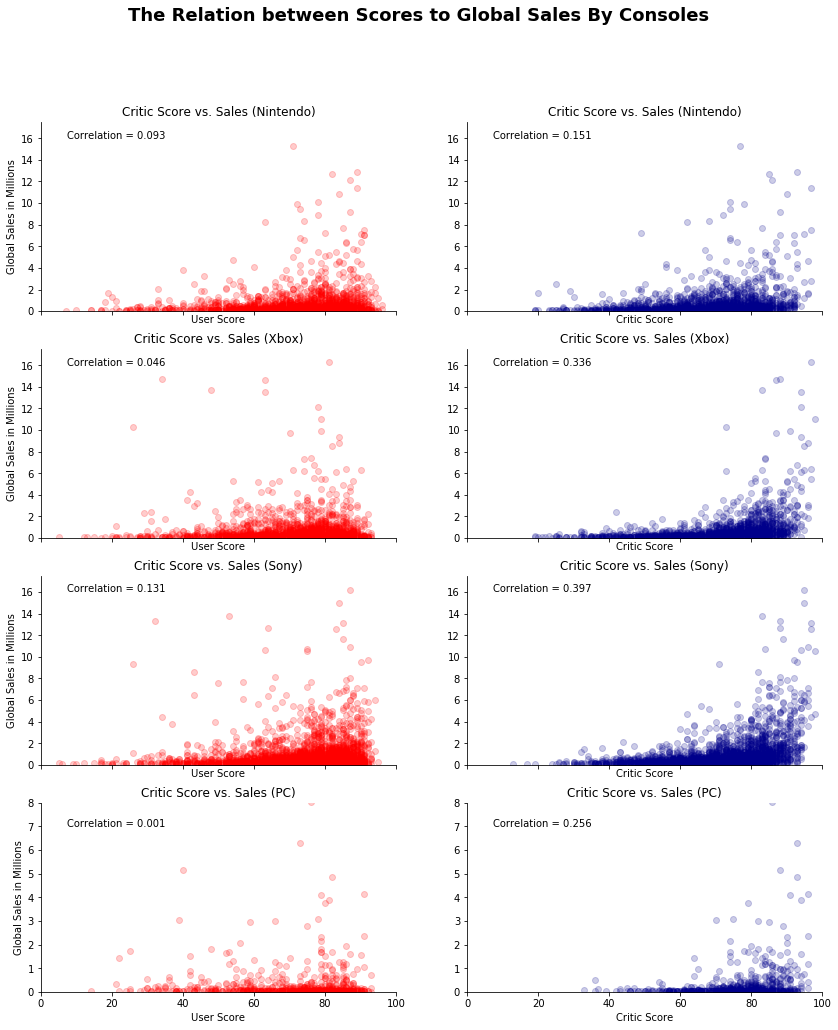

In [10]:
# Code for scatter plot comparing metascore against millions of sales and user score against millions of sales by consoles
fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex = True, figsize = (14,16))
ax = ax.ravel()

#labels
fig.suptitle("The Relation between Scores to Global Sales By Consoles", fontsize = 18, fontweight = "bold") 
nice_name = ['Nintendo','Xbox','Sony','PC']
combo_name = [combonintendo,comboxbox,combosony,combopc]

# Making correlation matrixs for each console combo
corr_mat_nintendo = combonintendo.corr()
corr_mat_sony = combosony.corr()
corr_mat_xbox = comboxbox.corr()
corr_mat_pc = combopc.corr()

count = 0
for var in ax:
    temp = combo_name[count//2]
    var.set_title('Critic Score vs. Sales ('+ nice_name[count//2]+')')
    
    if count%2 == 0:
        var.scatter(temp["userscore"], temp["tot_sale"], alpha= 0.2, c = 'Red')
        var.set_xlabel('User Score')
        var.set_ylabel('Global Sales in Millions')
        if count//2 == 0:
            cr = corr_mat_nintendo.tot_sale.userscore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 1:
            cr = corr_mat_xbox.tot_sale.userscore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 2:
            cr = corr_mat_sony.tot_sale.userscore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 3:
            cr = corr_mat_pc.tot_sale.userscore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 7, message, horizontalalignment='right')
            
    else:
        var.scatter(temp["metascore"], temp["tot_sale"], alpha= 0.2, c = "DarkBlue")
        var.set_xlabel('Critic Score')
        if count//2 == 0:
            cr = corr_mat_nintendo.tot_sale.metascore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 1:
            cr = corr_mat_xbox.tot_sale.metascore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 2:
            cr = corr_mat_sony.tot_sale.metascore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 3:
            cr = corr_mat_pc.tot_sale.metascore # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 7, message, horizontalalignment='right')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    var.set_xlim(0,100)
    if count > 5:
        var.set_ylim(0,8)
    else: 
        var.set_ylim(0,17.5)
    count+=1
    
plt.show()

## Plotting User Scores and Meta Scores by the Sales (in millions)

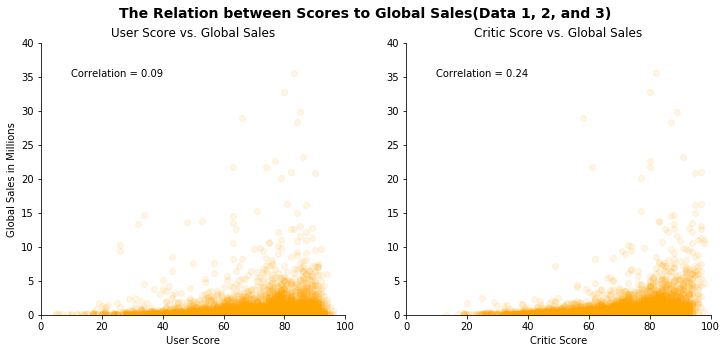

In [11]:
# Code for scatter plot comparing metascore against sales and user score against sales
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,5))
corr_mat1 = combo.corr()

#labels
fig.suptitle("The Relation between Scores to Global Sales(Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("User Score vs. Global Sales", fontsize = 12) 
ax[1].set_title("Critic Score vs. Global Sales", fontsize = 12)

count = 0
name_list = ['userscore','metascore']

for var in ax: 
    var.scatter(combo[name_list[count]], combo["tot_sale"], alpha= 0.1, c = 'Orange')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    cr = corr_mat1.tot_sale[name_list[count]] # get the correlation matrix
    message = "Correlation = " + str(round(cr,2))
    var.text(40, 35, message, horizontalalignment='right')
    var.set_xlim(0,100)
    var.set_ylim(0,40)
    count+=1
ax[0].set_ylabel("Global Sales in Millions")

ax[0].set_xlabel("User Score")
ax[1].set_xlabel("Critic Score")
plt.show()

In [12]:
# Create a new dataframe containing avg sales, metascore, and user score for each year

combo.sort_values("date", axis = 0, ascending = True, inplace = True)
# Make a list, year that contains all the years in combo2
year = []
for i in combo.date:
    if year.count(i) == 0:
        year.append(i)

In [13]:
# Make three lists, each containing the annual average sale, user score, and critic score
avg1 = 0
avg2 = 0
avg3 = 0
avg_sale = []
avg_user = []
avg_critic = []
for i in year:
    avg1 = combo[combo.date == i].tot_sale.mean()
    avg2 = combo[combo.date == i].userscore.mean()
    avg3 = combo[combo.date == i].metascore.mean()
    avg_sale.append(avg1)
    avg_user.append(avg2)
    avg_critic.append(avg3)
    avg1 = 0
    avg2 = 0
    avg3 = 0

In [14]:
# Make lists, years, avgsale, avguser,and acgcritic into pandas.Series
years = pd.Series(year,name='year')
avgsale = pd.Series(avg_sale, name = 'sale')
avguser = pd.Series(avg_user,name= 'user_score')
avgcritic = pd.Series(avg_critic, name = 'critic_score')

In [15]:
# Concat all the four series into a dataframe called annual_mean_combo
annual_mean_combo = pd.concat([years,avgsale,avguser,avgcritic],axis=1)
annual_mean_combo =annual_mean_combo.set_index('year')

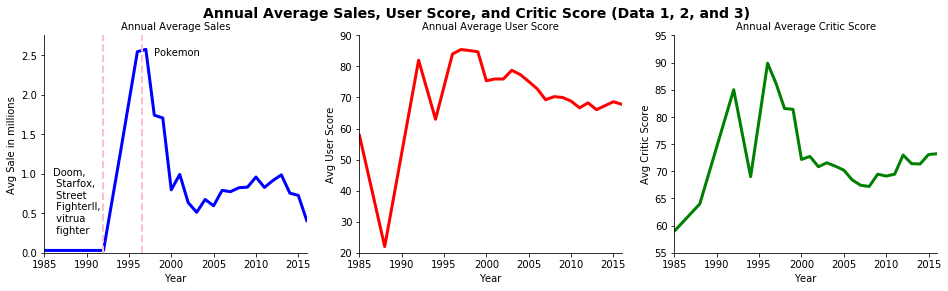

In [16]:
# Code for line graph comparing annual avg sales, user scores, critic scores against year
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))

#labels
fig.suptitle("Annual Average Sales, User Score, and Critic Score (Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("Annual Average Sales", fontsize = 10) 
ax[1].set_title("Annual Average User Score", fontsize = 10)
ax[2].set_title("Annual Average Critic Score", fontsize = 10)

count = 0
name_list = ['sale','user_score','critic_score']

annual_mean_combo.sale.plot(ax = ax[0], color = 'b', linewidth = 3.0)
annual_mean_combo.user_score.plot(ax = ax[1], color = 'r', linewidth = 3.0)
annual_mean_combo.critic_score.plot(ax = ax[2], color = 'g', linewidth = 3.0)
for var in ax: 
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlabel('Year')
    var.set_xlim(1985,2016)
    
    if count == 0 :
        var.set_ylabel('Avg Sale in millions')
        var.set_ylim(0,2.75)
    elif count == 1:
        var.set_ylabel('Avg User Score')
        var.set_ylim(20,90)
    else:
        var.set_ylabel('Avg Critic Score')
        var.set_ylim(55,95)
    count+=1    
ax[0].axvline(x=1992, color='pink', linestyle='--', linewidth=2)

message = "Doom, \n Starfox, \n Street \n FighterII, \n vitrua \n fighter " # Create the message, convert the number to a string,
                                                  # then add it 
ax[0].text(1986, 0.25, message, horizontalalignment='left') # then alling everything on the

ax[0].axvline(x=1996.5, color='pink', linestyle='--', linewidth=2)

message = "Pokemon" # Create the message, convert the number to a string,
                                                  # then add it 
ax[0].text(1998, 2.5, message, horizontalalignment='left') # then alling everything on the

plt.show()

In [17]:
# low correlation  --> got only data2
data2 = pd.read_csv("dataset/data2_modified.csv")

In [18]:
data2  = data2[data2.User_Count > 25]
data2  = data2[data2.Critic_Count > 20]
delete = ["Unnamed: 0",'NA_Sales','EU_Sales','JP_Sales',"Other_Sales",'Critic_Count','User_Count']
data2 = data2.drop(delete, axis = 1)
data2.User_Score = data2.User_Score*10

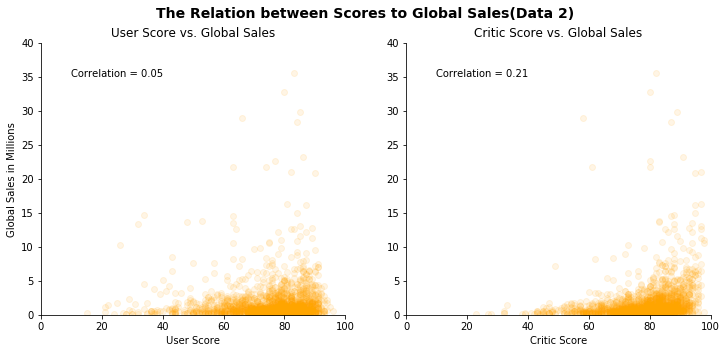

In [19]:
# Code for scatter plot comparing metascore against sales and user score against sales
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,5))
corr_mat = data2.corr()

#labels
fig.suptitle("The Relation between Scores to Global Sales(Data 2)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("User Score vs. Global Sales", fontsize = 12) 
ax[1].set_title("Critic Score vs. Global Sales", fontsize = 12)

count = 0
name_list = ['User_Score','Critic_Score']

for var in ax: 
    var.scatter(data2[name_list[count]], data2["Global_Sales"], alpha= 0.1, c = 'Orange')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    cr = corr_mat.Global_Sales[name_list[count]] # get the correlation matrix
    message = "Correlation = " + str(round(cr,2))
    var.text(40, 35, message, horizontalalignment='right')
    var.set_xlim(0,100)
    var.set_ylim(0,40)
    count+=1
ax[0].set_ylabel("Global Sales in Millions")

ax[0].set_xlabel("User Score")
ax[1].set_xlabel("Critic Score")
plt.show()

In [20]:
# Split combo into smaller dataframes according to the console and store them in a list "grouped"
grouped = data2.groupby('Platform')

In [21]:
combonintendo = grouped.get_group('GC') # Creates a dataframe combonintendo
nintendo_list = ['DS', '3DS', 'Wii', 'GBA', 'WiiU'] # Types of nintendo consoles

for i in nintendo_list:
    combonintendo = combonintendo.append(grouped.get_group(i), ignore_index = True)

In [22]:
combopc = grouped.get_group('PC') # Creates a dataframe combopc

In [23]:
comboxbox = grouped.get_group('XOne') # Creates a dataframe comboxbox

comboxbox = comboxbox.append(grouped.get_group('X360'), ignore_index = True)
comboxbox = comboxbox.append(grouped.get_group('XB'), ignore_index = True)

In [24]:
combosony = grouped.get_group('PS') # Store info on the original Playstation as of this line.
sony_list = ['PS2', 'PS3', 'PS4', 'PSP', 'PSV'] # Types of playstation consoles

for i in sony_list:
    combosony = combosony.append(grouped.get_group(i), ignore_index = True)

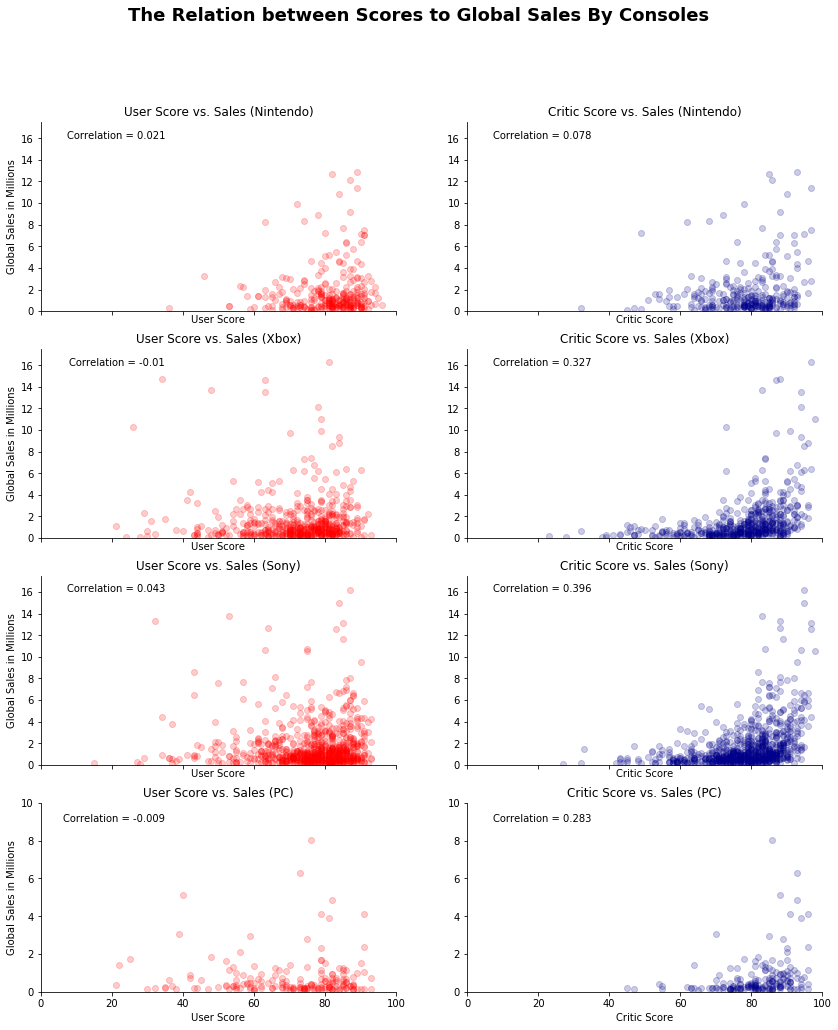

In [30]:
# Code for scatter plot comparing metascore against millions of sales and user score against millions of sales by consoles
fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex = True, figsize = (14,16))
ax = ax.ravel()

#labels
fig.suptitle("The Relation between Scores to Global Sales By Consoles", fontsize = 18, fontweight = "bold") 
nice_name = ['Nintendo','Xbox','Sony','PC']
combo_name = [combonintendo,comboxbox,combosony,combopc]

# Making correlation matrixs for each console combo
corr_mat_nintendo = combonintendo.corr()
corr_mat_sony = combosony.corr()
corr_mat_xbox = comboxbox.corr()
corr_mat_pc = combopc.corr()

count = 0
for var in ax:
    temp = combo_name[count//2]
    
    if count%2 == 0:
        var.set_title('User Score vs. Sales ('+ nice_name[count//2]+')')
        var.scatter(temp["User_Score"], temp["Global_Sales"], alpha= 0.2, c = 'Red')
        var.set_xlabel('User Score')
        var.set_ylabel('Global Sales in Millions')
        if count//2 == 0:
            cr = corr_mat_nintendo.Global_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 1:
            cr = corr_mat_xbox.Global_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 2:
            cr = corr_mat_sony.Global_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 3:
            cr = corr_mat_pc.Global_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 9, message, horizontalalignment='right')
            
    else:
        var.set_title('Critic Score vs. Sales ('+ nice_name[count//2]+')')
        var.scatter(temp["Critic_Score"], temp["Global_Sales"], alpha= 0.2, c = "DarkBlue")
        var.set_xlabel('Critic Score')
        if count//2 == 0:
            cr = corr_mat_nintendo.Global_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 1:
            cr = corr_mat_xbox.Global_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 2:
            cr = corr_mat_sony.Global_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 16, message, horizontalalignment='right')
        elif count//2 == 3:
            cr = corr_mat_pc.Global_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 9, message, horizontalalignment='right')
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    var.set_xlim(0,100)
    if count > 5:
        var.set_ylim(0,10)
    else: 
        var.set_ylim(0,17.5)
    count+=1
    
plt.show()

In [48]:
data2 = pd.read_csv("dataset/data2_modified.csv")

In [49]:
data2  = data2[data2.User_Count > 25]
data2  = data2[data2.Critic_Count > 20]

In [50]:
drop_list = ['Unnamed: 0','Platform','Global_Sales','Critic_Count','User_Count','Name','Year_of_Release']
data2 = data2.drop(drop_list,axis = 1)
data2.User_Score = data2.User_Score*10

In [51]:
data2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score
0,41.36,28.96,3.77,8.45,76.0,80.0
1,15.68,12.76,3.79,3.29,82.0,83.0
2,15.61,10.93,3.28,2.95,80.0,80.0
3,11.28,9.14,6.50,2.88,89.0,85.0
4,13.96,9.18,2.93,2.84,58.0,66.0
5,14.44,6.94,4.70,2.24,87.0,84.0
6,9.71,7.47,4.13,1.90,91.0,86.0
7,8.92,8.03,3.60,2.15,80.0,77.0
8,15.00,4.89,0.24,1.69,61.0,63.0
9,9.01,8.49,2.53,1.77,80.0,74.0


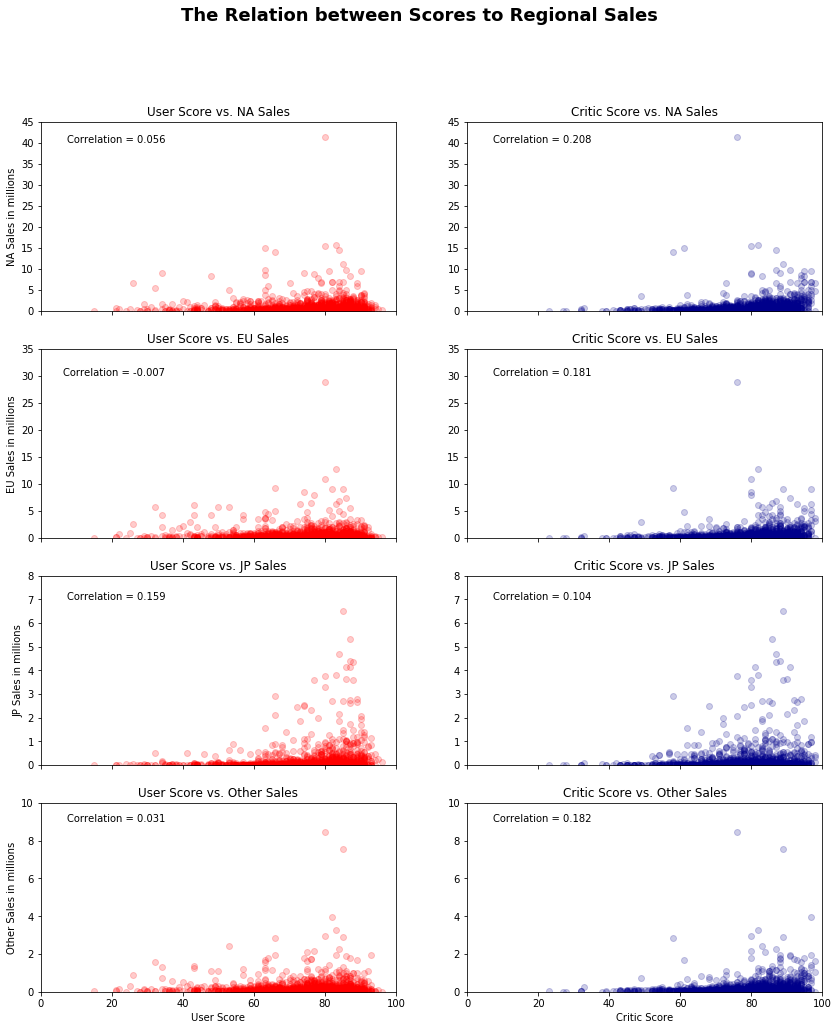

In [65]:
# Code for scatter plot comparing metascore against millions of sales and user score against millions of sales by consoles
fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex = True, figsize = (14,16))
ax = ax.ravel()

#labels
fig.suptitle("The Relation between Scores to Regional Sales", fontsize = 18, fontweight = "bold") 
nice_name = ['NA','EU','JP','Other']

# Making correlation matrixs for each console combo
corr_mat = data2.corr()

count = 0
for var in ax:
    var.set_xlim(0,100)
    if count//2 == 0:
        if count%2 == 0:
            var.scatter(data2["User_Score"], data2["NA_Sales"], alpha= 0.2, c = 'Red')
            cr = corr_mat.NA_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 40, message, horizontalalignment='right')
            var.set_title('User Score vs. '+nice_name[count//2]+" Sales")
            var.set_ylabel("NA Sales in millions")
            var.set_ylim(0,45)
        else:
            var.scatter(data2["Critic_Score"], data2["NA_Sales"], alpha= 0.2, c = "DarkBlue")
            cr = corr_mat.NA_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 40, message, horizontalalignment='right')
            var.set_title('Critic Score vs. '+nice_name[count//2]+" Sales")
            var.set_ylim(0,45)
    elif count//2 == 1:
        if count%2 == 0:
            var.scatter(data2["User_Score"], data2["EU_Sales"], alpha= 0.2, c = 'Red')
            cr = corr_mat.EU_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 30, message, horizontalalignment='right')
            var.set_title('User Score vs. '+nice_name[count//2]+" Sales")
            var.set_ylabel('EU Sales in millions')
            var.set_ylim(0,35)
        else:
            var.scatter(data2["Critic_Score"], data2["EU_Sales"], alpha= 0.2, c = "DarkBlue")
            cr = corr_mat.EU_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 30, message, horizontalalignment='right')
            var.set_title('Critic Score vs. '+nice_name[count//2]+" Sales")
            var.set_ylim(0,35)
    elif count//2 == 2:
        if count%2 == 0:
            var.scatter(data2["User_Score"], data2["JP_Sales"], alpha= 0.2, c = 'Red')
            cr = corr_mat.JP_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 7, message, horizontalalignment='right')
            var.set_title('User Score vs. '+nice_name[count//2]+" Sales")
            var.set_ylabel('JP Sales in millions')
            var.set_ylim(0,8)
        else:
            var.scatter(data2["Critic_Score"], data2["JP_Sales"], alpha= 0.2, c = "DarkBlue")
            cr = corr_mat.JP_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 7, message, horizontalalignment='right')
            var.set_title('Critic Score vs. '+nice_name[count//2]+" Sales")
            var.set_ylim(0,8)
    elif count//2 == 3:
        if count%2 == 0:
            var.scatter(data2["User_Score"], data2["Other_Sales"], alpha= 0.2, c = 'Red')
            cr = corr_mat.Other_Sales.User_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 9, message, horizontalalignment='right')
            var.set_title('User Score vs. '+nice_name[count//2]+" Sales")
            var.set_ylabel('Other Sales in millions')
            var.set_xlabel("User Score")
            var.set_ylim(0,10)
        else:
            var.scatter(data2["Critic_Score"], data2["Other_Sales"], alpha= 0.2, c = "DarkBlue")
            cr = corr_mat.Other_Sales.Critic_Score # get the correlation matrix
            message = "Correlation = " + str(round(cr,3))
            var.text(35, 9, message, horizontalalignment='right')
            var.set_title('Critic Score vs. '+nice_name[count//2]+" Sales")
            var.set_xlabel("Critic Score")
            var.set_ylim(0,10)
    count+=1
    
plt.show()